---

# ANÁLISE EXPLORATÓRIA DE DADOS COM PANDAS - DESAFIO 💻

---


**Objetivo:** Realizar uma análise exploratória básica do conjunto de dados de salários em ciência de dados para entender as tendências de salários, a distribuição de cargos, a relação entre nível de experiência e salário, entre outros insights. 

---

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


---

### **Parte 1:** Preparação e Limpeza dos Dados 




**1. Carregar o Dataset:** 

Utilize o Pandas para carregar o arquivo ds_salaries.csv como
um DataFrame. 


In [119]:
df_salarios = pd.read_csv("arquivos/ds_salarios.csv")

**2. Exploração Inicial:**

a. Visualize as primeiras e últimas linhas do DataFrame para ter uma ideia
geral dos dados.

b. Use o método .info() para entender os tipos de dados e se há valores
ausentes. 


In [120]:
#Visualizando dataframe (5 primeiras linhas e 5 ultimas linhas)
df_salarios

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [121]:
#Visualizando as informações gerais do dataframe
df_salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


**3. Limpeza dos Dados:**

a. Verifique se existem valores duplicados e remova-os se necessário.

b. Avalie se há valores ausentes e decida como lidar com eles (remoção,
imputação, etc.). 


In [122]:
#Verificando se existe valores duplicados (total).
df_salarios.duplicated().sum()

1171

In [123]:
df_salaries = df_salarios.drop_duplicates()

In [124]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [125]:
#Verificando se existe valores ausentes
df_salaries.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

---

**4.Resultado da Preparação e Limpeza:**

-Foi criado um novo dataframe para excluir as informações duplicadas, preservando o dataframe original.
-Não existia valores NULL.

Mas o tipo de dado da coluna work_year, farei uma alteração para o tipo datetime, apenas para deixar preparado para análises envolvendo data. Caso se tenha esse tipo de análise se faz necessária essa conversão.

---

In [126]:
# Converter a coluna 'work_year' para um formato de data, definindo todos os valores para o primeiro dia de cada ano
df_salaries['work_year_date'] = pd.to_datetime(df_salaries['work_year'], format='%Y')

# Verificar os primeiros registros para confirmar a conversão
df_salaries[['work_year', 'work_year_date']].head()

C:\Users\Nayar\AppData\Local\Temp\ipykernel_26716\644287071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salaries['work_year_date'] = pd.to_datetime(df_salaries['work_year'], format='%Y')


,work_year,work_year_date
0,2023,2023-01-01
1,2023,2023-01-01
2,2023,2023-01-01
3,2023,2023-01-01
4,2023,2023-01-01


---

### **Parte 2:** Análise Exploratória 


**1. Análise Descritiva:**

a. Utilize .describe() para obter um resumo estatístico das colunas numéricas.

b. Identifique a média, mediana e desvio padrão dos salários em USD. 

In [127]:
#Verificando um resumo estatístico usando o describe.
df_salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio,work_year_date
count,2584.000000,2.584000e+03,2584.000000,2584.000000,2584
mean,2022.301084,2.103653e+05,133409.280186,50.483746,2022-04-20 20:47:44.396284928
min,2020.000000,6.000000e+03,5132.000000,0.000000,2020-01-01 00:00:00
25%,2022.000000,9.000000e+04,84975.000000,0.000000,2022-01-01 00:00:00
50%,2022.000000,1.346300e+05,130000.000000,50.000000,2022-01-01 00:00:00
75%,2023.000000,1.825625e+05,175000.000000,100.000000,2023-01-01 00:00:00
max,2023.000000,3.040000e+07,450000.000000,100.000000,2023-01-01 00:00:00
std,0.749179,8.080375e+05,67136.837329,48.163707,NaN


In [128]:
# Identificar média, mediana e desvio padrão dos salários em USD
mean_salary = df_salaries['salary_in_usd'].mean()
median_salary = round(df_salaries['salary_in_usd'].median(),2) #pode arredondar dessa forma
std_salary = df_salaries['salary_in_usd'].std().__round__(2) #pode arredondar dessa forma

print(f"Média dos salários em USD: {(mean_salary).round(2)}") #pode arredondar dessa forma
print(f"Mediana dos salários em USD: {median_salary}")
print(f"Desvio Padrão dos salários em US: {std_salary}")    

Média dos salários em USD: 133409.28
Mediana dos salários em USD: 130000.0
Desvio Padrão dos salários em US: 67136.84


**2. Distribuição de Cargos:**

a. Faça uma contagem de quantas vezes cada título de trabalho aparece e
visualize os 10 cargos mais comuns. 


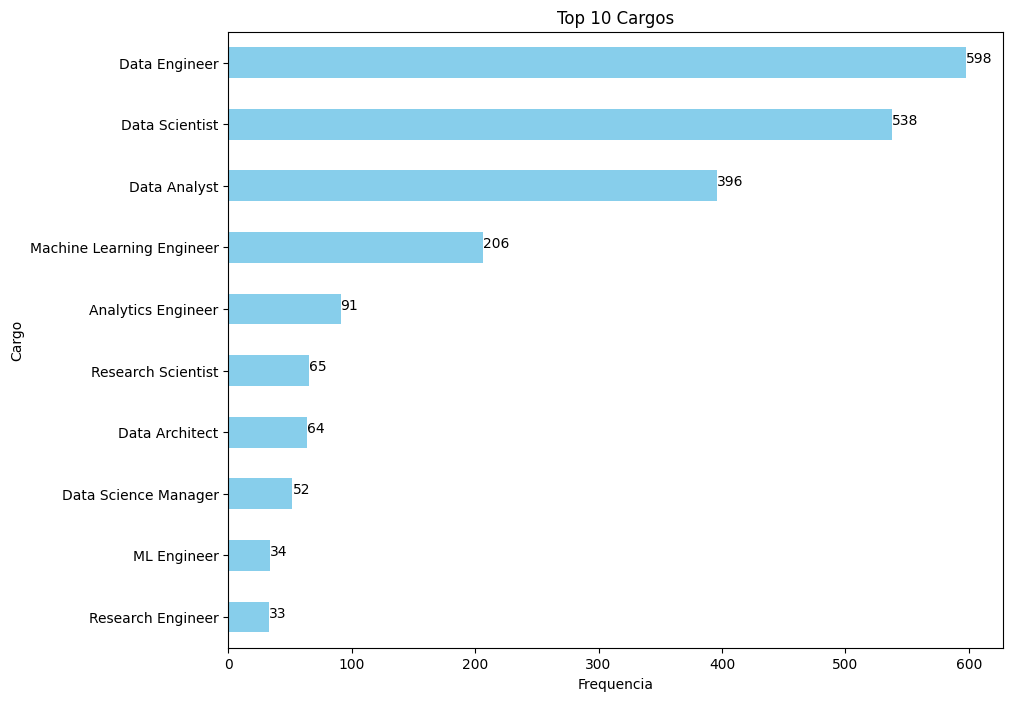

job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
Research Scientist            65
Data Architect                64
Data Science Manager          52
ML Engineer                   34
Research Engineer             33
dtype: int64

In [138]:
# Contagem e top10 cargos.
contagem_cargos= df_salaries.groupby('job_title').size().sort_values(ascending=False).head(10)

# Visualizando os top10 cargos
plt.figure(figsize=(10, 8))
contagem_cargos.plot(kind='barh', color='skyblue')
plt.title('Top 10 Cargos')
plt.xlabel('Frequencia')
plt.ylabel('Cargo')
plt.gca().invert_yaxis()  # Invertendo o eixo para mostrar o com maior quantidade primeiro.

# Adicionando os rótulos.
for index, value in enumerate(contagem_cargos):
    plt.text(value, index, str(value))

plt.show()

contagem_cargos

---

**Resultado**

Os dados mostraram que os títulos de trabalho mais comuns são "Data Scientist", "Data Engineer" e "Data Analyst". 
Esses cargos representam uma ampla gama de funções dentro do campo da ciência de dados, desde a análise de dados até o desenvolvimento de sistemas de aprendizado de máquina e a engenharia de dados.

---

**3. Relação Salário e Experiência:**

a. Agrupe os dados pelo nível de experiência e calcule o salário médio para
cada grupo. 


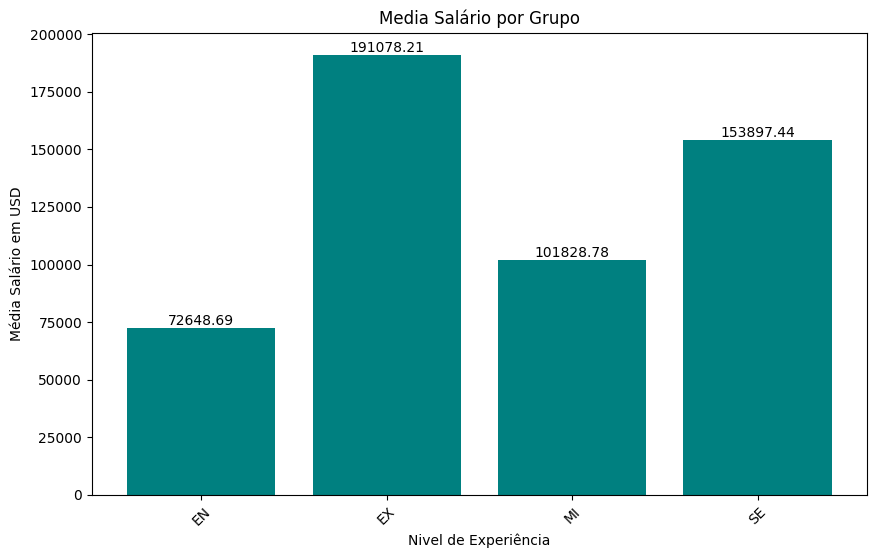

experience_level
EN     72648.69
EX    191078.21
MI    101828.78
SE    153897.44
Name: salary_in_usd, dtype: float64

In [139]:
# Group data by experience level and calculate the average salary for each group
salario_medio_grupo = df_salaries.groupby('experience_level')['salary_in_usd'].mean().round(2)

# Visualization of average salary by experience level with labels
plt.figure(figsize=(10, 6))
bars = plt.bar(salario_medio_grupo.index, salario_medio_grupo.values, color='teal')

plt.title('Media Salário por Grupo')
plt.xlabel('Nivel de Experiência')
plt.ylabel('Média Salário em USD')
plt.xticks(rotation=45)

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

salario_medio_grupo

---

**Resultado**

Os dados indicaram que existe uma progressão clara nos salários médios à medida que o nível de experiência aumenta. Especificamente, os executivos (EX) apresentaram os salários médios mais altos, seguidos por sêniores (SE), intermediários (MI) e, por fim, os profissionais de nível de entrada (EN).

---


**4. Tendências ao Longo do Tempo:**

a. Analise como os salários em USD mudaram ao longo dos anos disponíveis
no dataset.

b. Visualize esta tendência para entender melhor a evolução dos salários. 

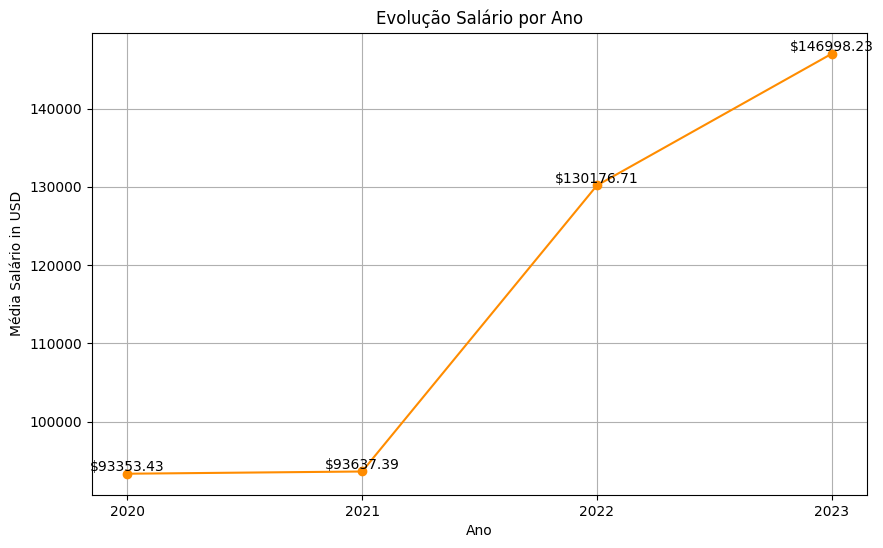

work_year
2020     93353.43
2021     93637.39
2022    130176.71
2023    146998.23
Name: salary_in_usd, dtype: float64

In [140]:
# média do salário por ano e visualização dos salários por ano
media_salario_ano = df_salaries.groupby('work_year')['salary_in_usd'].mean().round(2)

# Visualização dos salários por ano.
plt.figure(figsize=(10, 6))
plt.plot(media_salario_ano.index, media_salario_ano.values, marker='o', linestyle='-', color='darkorange')

plt.title('Evolução Salário por Ano')
plt.xlabel('Ano')
plt.ylabel('Média Salário in USD')
plt.xticks(media_salario_ano.index)
plt.grid(True)

# Rótulos
for year, media_salario in media_salario_ano.items():
    plt.text(year, media_salario, f"${media_salario}", ha='center', va='bottom')

plt.show()

media_salario_ano


---

**Resultado Análise:**

Observa-se um aumento consistente no salário médio em USD de 2020 a 2022. A tendência ascendente indica uma valorização dos profissionais na área de ciência de dados ao longo desse período, com um aumento significativo no salário médio entre 2021 e 2022. Os rótulos sobre cada ponto da linha proporcionam uma compreensão clara do salário médio anual, facilitando a visualização do crescimento salarial ao longo do tempo.

---



### **Parte 3:** Visualização dos Dados 


**1. Visualização de Salários:**

a. Crie histogramas para visualizar a distribuição dos salários em USD.

b. Use gráficos de caixa (boxplot) para comparar a distribuição dos salários
entre diferentes níveis de experiência. 

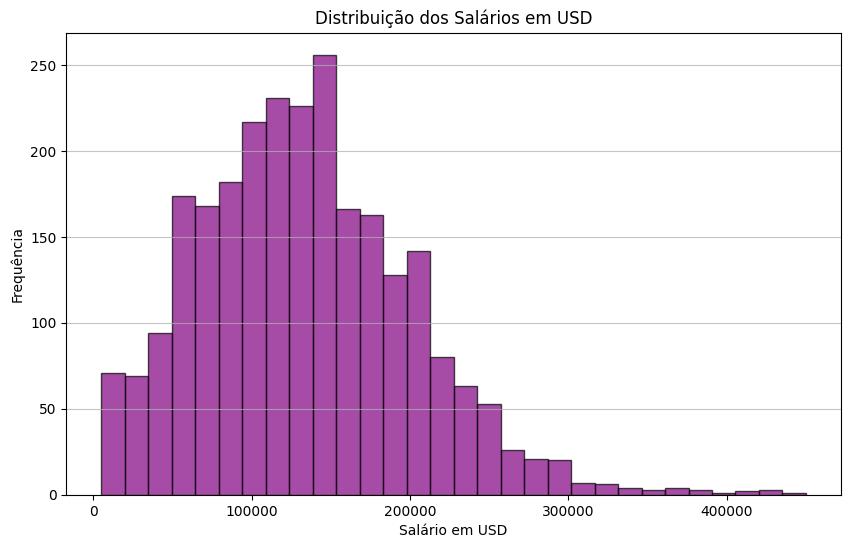

In [132]:
# Criação de histogramas para visualizar a distribuição dos salários em USD
plt.figure(figsize=(10, 6))
plt.hist(df_salaries['salary_in_usd'], bins=30, color='purple', edgecolor='black', alpha=0.7)

plt.title('Distribuição dos Salários em USD')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)

plt.show()


---

**Resultado:**

Concentração Salarial: A forma do histograma pode indicar onde a maioria dos salários se concentra. Por exemplo, uma concentração de barras em faixas salariais mais baixas sugere que a maioria dos profissionais de ciência de dados possui salários dentro dessa faixa.

Distribuição dos Salários: A presença de barras em intervalos mais altos de salário indica a existência de profissionais com salários bem maiores, embora não sejam frequentes.

Outliers: A existência de barras isoladas em faixas salariais muito altas pode indicar a presença de outliers, ou seja, salários excepcionalmente altos em comparação com a maioria.

---

C:\Users\Nayar\AppData\Local\Temp\ipykernel_26716\1008221174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='Set2')


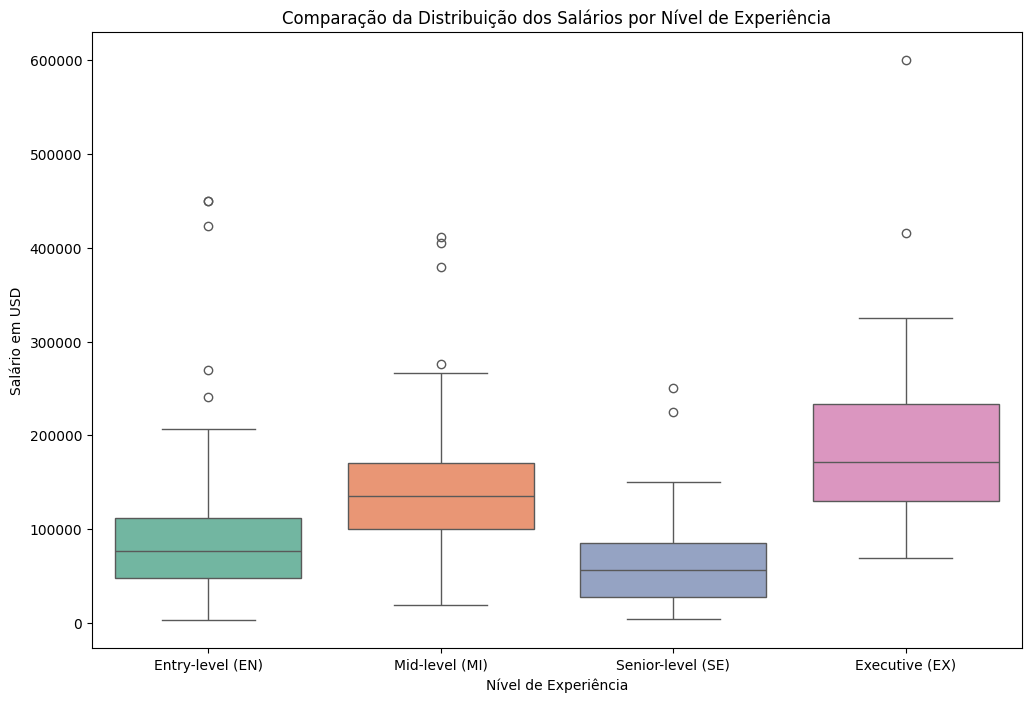

In [133]:
# Criação de gráficos de caixa (boxplot) para comparar a distribuição dos salários entre diferentes níveis de experiência
plt.figure(figsize=(12, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, palette='Set2')

plt.title('Comparação da Distribuição dos Salários por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Entry-level (EN)', 'Mid-level (MI)', 'Senior-level (SE)', 'Executive (EX)'])

plt.show()

---

**Resultado**

Este gráfico proporciona uma visão clara das variações salariais entre os diferentes níveis de experiência.
Observa-se uma tendência geral de aumento no salário mediano à medida que o nível de experiência avança, com os executivos (EX) apresentando a maior variação salarial. ​

---

**2. Distribuição Geográfica:**

a. Analise a distribuição dos salários com base na localização da empresa
e/ou residência do empregado.

b. Crie um gráfico que mostre os países com os maiores salários médios. 

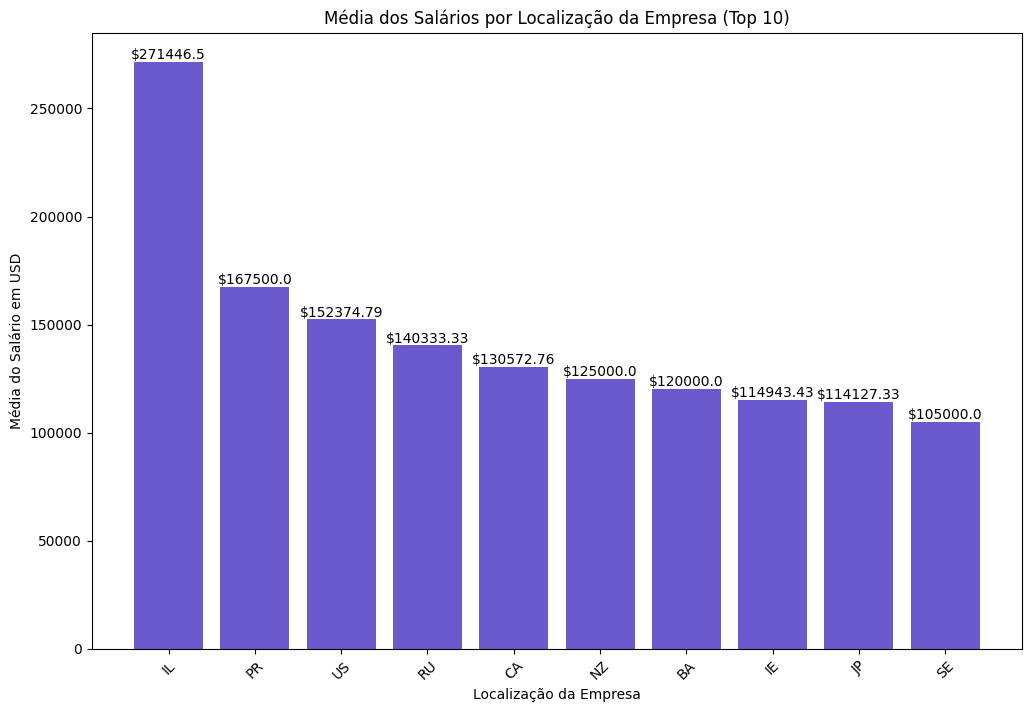

company_location
IL    271446.50
PR    167500.00
US    152374.79
RU    140333.33
CA    130572.76
NZ    125000.00
BA    120000.00
IE    114943.43
JP    114127.33
SE    105000.00
Name: salary_in_usd, dtype: float64

In [134]:
# Agrupar dados pela localização da empresa e calcular a média do salário em USD para cada localização
media_salario_localizacao_empresa= df_salaries.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).round(2)

# Médias dos salários por localização da empresa - Top 10
plt.figure(figsize=(12, 8))
bars_company_location = plt.bar(media_salario_localizacao_empresa.head(10).index, media_salario_localizacao_empresa.head(10).values, color='slateblue')
plt.title('Média dos Salários por Localização da Empresa (Top 10)')
plt.xlabel('Localização da Empresa')
plt.ylabel('Média do Salário em USD')
plt.xticks(rotation=45)

# Adicionando rótulos
for bar in bars_company_location:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"${height}", ha='center', va='bottom')

plt.show()

media_salario_localizacao_empresa.head(10)


---

**Resultado**

As localizações das empresas com as médias salariais mais altas variam globalmente, destacando a influência geográfica nos salários dos profissionais de ciência de dados.
Existe uma variação significativa nas médias salariais entre diferentes localizações, sugerindo que a localização da empresa pode ter um impacto substancial na remuneração dos profissionais de dados.

---

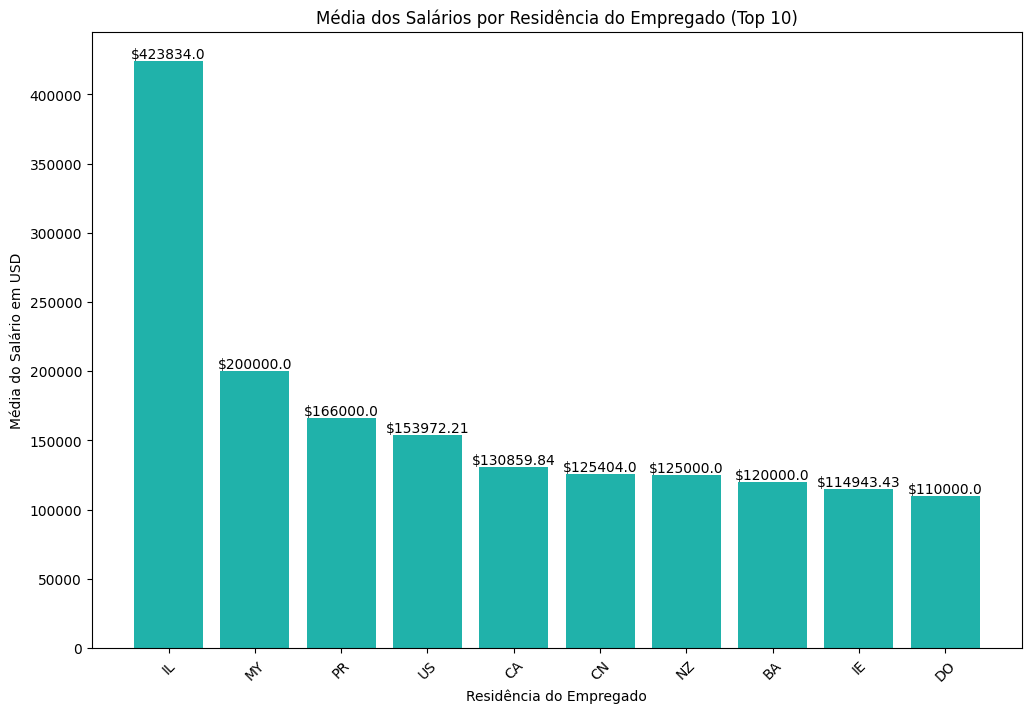

employee_residence
IL    423834.00
MY    200000.00
PR    166000.00
US    153972.21
CA    130859.84
CN    125404.00
NZ    125000.00
BA    120000.00
IE    114943.43
DO    110000.00
Name: salary_in_usd, dtype: float64

In [135]:
# Agrupar dados pela residência do empregado e calcular a média do salário em USD para cada localização
media_salario_resindencia = df_salaries.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).round(2)

# Médias dos salários por residência do empregado - Top 10
plt.figure(figsize=(12, 8))
bars_employee_residence = plt.bar(media_salario_resindencia.head(10).index, media_salario_resindencia.head(10).values, color='lightseagreen')
plt.title('Média dos Salários por Residência do Empregado (Top 10)')
plt.xlabel('Residência do Empregado')
plt.ylabel('Média do Salário em USD')
plt.xticks(rotation=45)

# Adicionando rótulos
for bar in bars_employee_residence:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"${height}", ha='center', va='bottom')

plt.show()

media_salario_resindencia.head(10)

---

**Resultado**

A análise destaca a importância de considerar a localização geográfica ao avaliar oportunidades de emprego e negociar salários, já que a residência do empregado pode impactar substancialmente a remuneração.

---



### **Parte 4:** Conclusão e Insights 


Os resultado da análises está em cada tópico abordado no notebook.

---